## Data Visualization, Correlation Plots

Here we are going to perform data visualization in order to see if there is a significant difference amongst the groups with respect to each feature. After that we will perform correlation in order to check for multicollinearity

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df = pd.read_csv("../dataset/merged.csv")
df

,Time(ms),ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
0,453796,-40,970,326,-36,962,242,320,657,349,0
1,453937,-60,990,316,54,953,262,77,914,446,0
2,454015,-111,980,346,-27,953,262,-48,857,446,0
3,454031,-111,980,346,36,981,232,-38,800,446,0
4,454046,-60,1009,346,18,972,242,77,866,436,0
...,...,...,...,...,...,...,...,...,...,...,...
1021876,2446875,-212,1000,376,690,-166,282,77,942,349,1
1021877,2446890,-232,970,356,572,-55,10,67,961,339,1
1021878,2446906,-232,970,356,272,92,-70,97,961,359,1
1021879,2446921,-252,921,346,354,18,-171,87,952,359,1


In [71]:
df.drop(columns="Time(ms)", inplace=True)
df

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
0,-40,970,326,-36,962,242,320,657,349,0
1,-60,990,316,54,953,262,77,914,446,0
2,-111,980,346,-27,953,262,-48,857,446,0
3,-111,980,346,36,981,232,-38,800,446,0
4,-60,1009,346,18,972,242,77,866,436,0
...,...,...,...,...,...,...,...,...,...,...
1021876,-212,1000,376,690,-166,282,77,942,349,1
1021877,-232,970,356,572,-55,10,67,961,339,1
1021878,-232,970,356,272,92,-70,97,961,359,1
1021879,-252,921,346,354,18,-171,87,952,359,1


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021881 entries, 0 to 1021880
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype
---  ------                     --------------    -----
 0   ankle_acc_hor_forward      1021881 non-null  int64
 1   ankle_acc_ver              1021881 non-null  int64
 2   ankle_acc_hor_lateral      1021881 non-null  int64
 3   upper_leg_acc_hor_forward  1021881 non-null  int64
 4   upper_leg_acc_ver          1021881 non-null  int64
 5   upper_leg_acc_hor_lateral  1021881 non-null  int64
 6   trunk_acc_hor_forward      1021881 non-null  int64
 7   trunk_acc_ver              1021881 non-null  int64
 8   trunk_acc_hor_lateral      1021881 non-null  int64
 9   annotation                 1021881 non-null  int64
dtypes: int64(10)
memory usage: 78.0 MB


In [73]:
df_0 = df[df["annotation"] == 0]
df_0

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
0,-40,970,326,-36,962,242,320,657,349,0
1,-60,990,316,54,953,262,77,914,446,0
2,-111,980,346,-27,953,262,-48,857,446,0
3,-111,980,346,36,981,232,-38,800,446,0
4,-60,1009,346,18,972,242,77,866,436,0
...,...,...,...,...,...,...,...,...,...,...
985130,-373,931,306,854,398,-30,126,1009,9,0
985131,-363,911,306,872,379,-20,135,1009,-19,0
985132,-353,950,297,845,388,-10,126,990,-19,0
985133,-363,931,316,863,388,-20,126,1000,-29,0


In [74]:
df_1 = df[df["annotation"] == 1]
df_1

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
17828,-30,990,326,-45,972,181,-38,1000,29,1
17829,-30,1000,356,-18,981,212,-48,1028,29,1
17830,-20,990,336,18,981,222,-38,1038,9,1
17831,-20,1000,316,36,990,222,-19,1038,9,1
17832,0,990,316,36,990,212,-29,1038,29,1
...,...,...,...,...,...,...,...,...,...,...
1021876,-212,1000,376,690,-166,282,77,942,349,1
1021877,-232,970,356,572,-55,10,67,961,339,1
1021878,-232,970,356,272,92,-70,97,961,359,1
1021879,-252,921,346,354,18,-171,87,952,359,1


In [75]:
df_2 = df[df["annotation"] == 2]
df_2

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
35405,-202,960,425,445,888,464,-203,885,252,2
35406,-20,1127,386,536,907,333,-300,923,252,2
35407,-80,1058,475,672,981,232,-359,990,135,2
35408,-90,1156,534,836,888,151,-359,990,-19,2
35409,-333,931,514,-290,611,151,-29,761,194,2
...,...,...,...,...,...,...,...,...,...,...
929559,161,1029,207,-309,916,202,155,961,126,2
929560,262,1000,257,-254,907,191,165,923,155,2
929561,151,1019,188,-254,907,191,174,923,116,2
929562,171,1029,178,-254,935,171,184,914,145,2


[(-10000.0, 10000.0)]

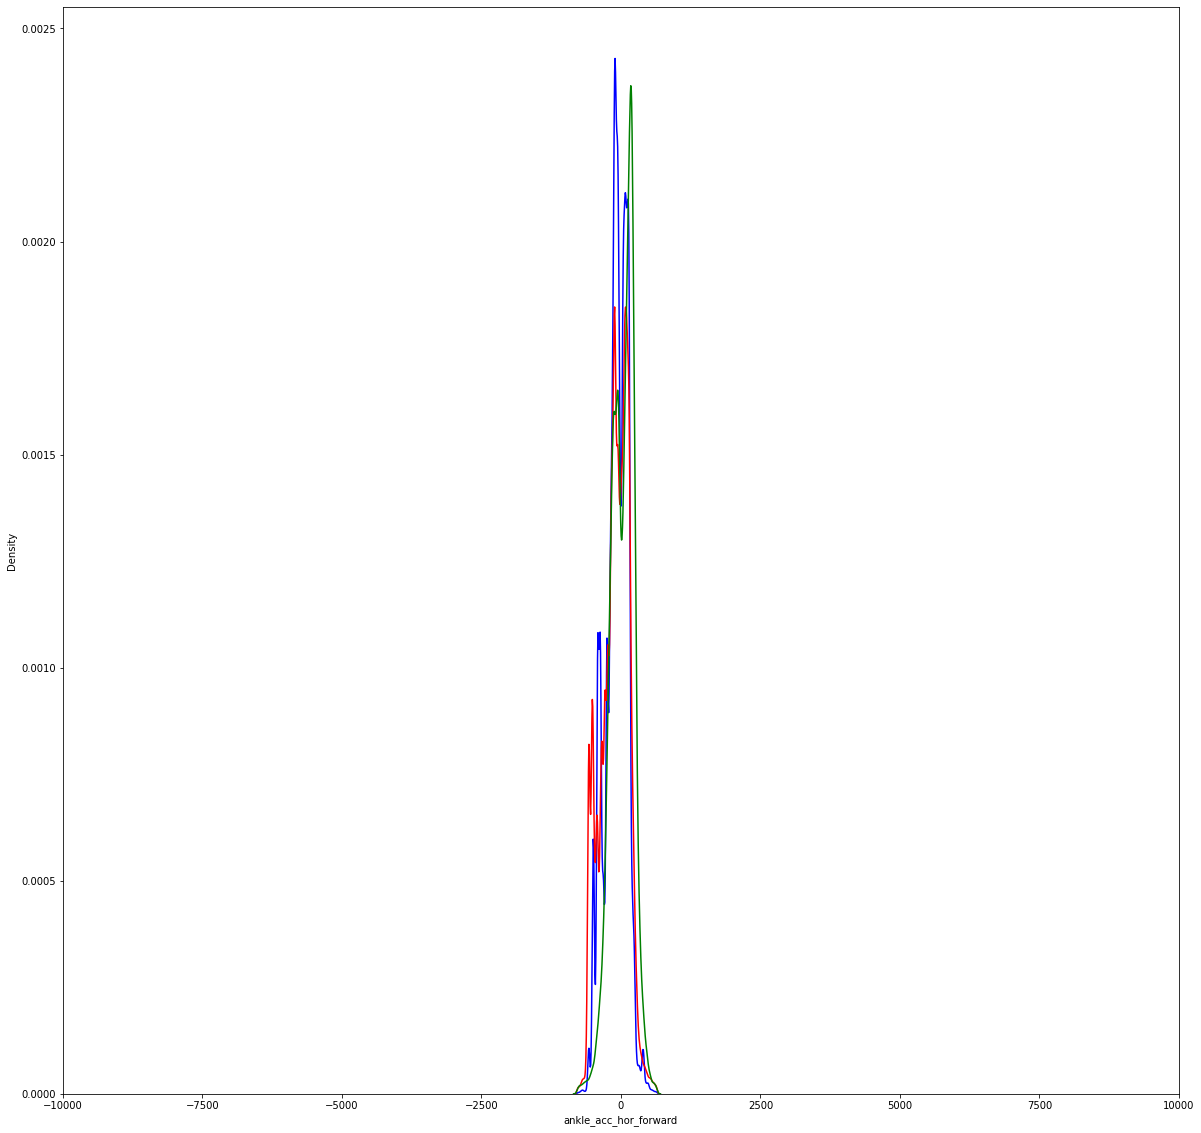

In [76]:
plt.figure(figsize= (20,20))
ax = sns.kdeplot(df_0['ankle_acc_hor_forward'],  color="blue", label="df_0_ankle_acc_hor_forward")
ax = sns.kdeplot(df_1['ankle_acc_hor_forward'],  color="red", label="df_1_ankle_acc_hor_forward")
ax = sns.kdeplot(df_2['ankle_acc_hor_forward'],  color="green", label="df_2_ankle_acc_hor_forward")
ax.set(xlim=(-10000, 10000))


[(-10000.0, 10000.0)]

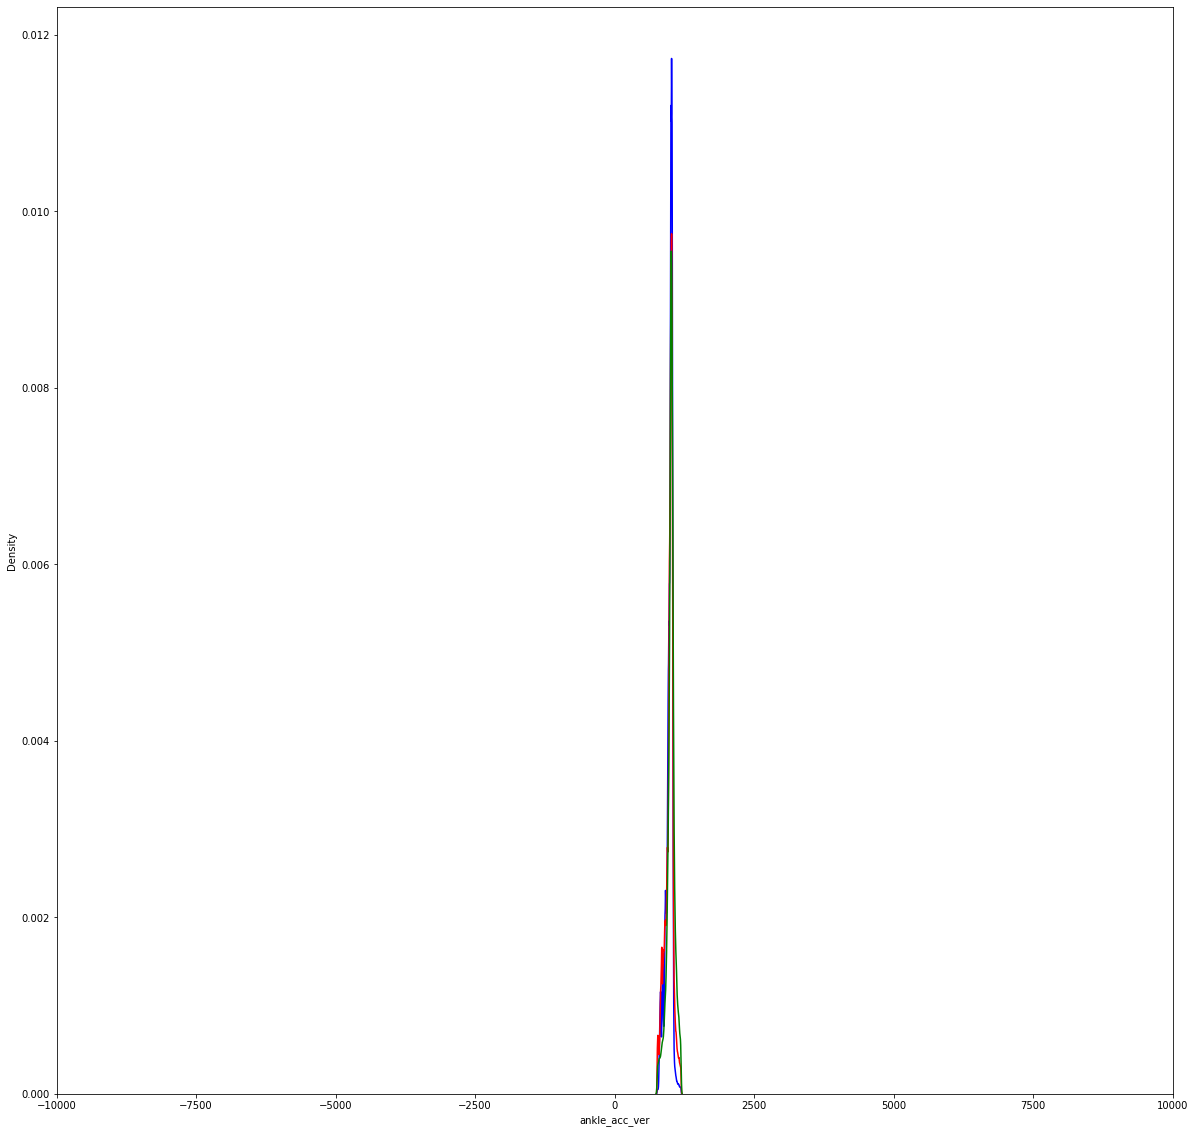

In [77]:
plt.figure(figsize= (20,20))
ax = sns.kdeplot(df_0['ankle_acc_ver'],  color="blue", label="df_0_ankle_acc_hor_forward")
ax = sns.kdeplot(df_1['ankle_acc_ver'],  color="red", label="df_1_ankle_acc_hor_forward")
ax = sns.kdeplot(df_2['ankle_acc_ver'],  color="green", label="df_2_ankle_acc_hor_forward")
ax.set(xlim=(-10000, 10000))


[(-10000.0, 10000.0)]

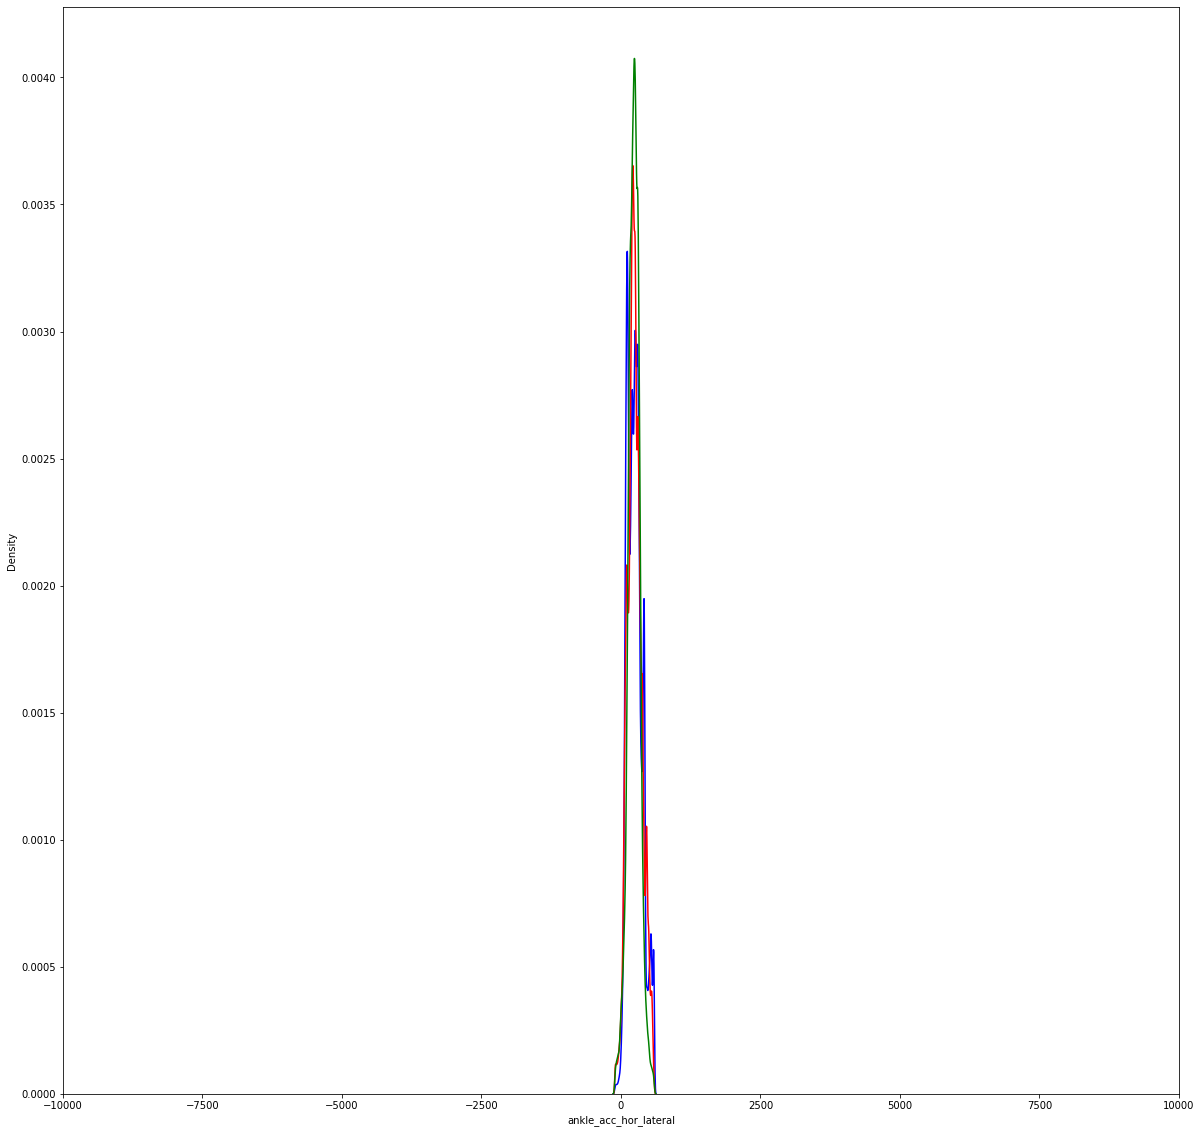

In [78]:
plt.figure(figsize= (20,20))
ax = sns.kdeplot(df_0['ankle_acc_hor_lateral'],  color="blue", label="df_0_ankle_acc_hor_forward")
ax = sns.kdeplot(df_1['ankle_acc_hor_lateral'],  color="red", label="df_1_ankle_acc_hor_forward")
ax = sns.kdeplot(df_2['ankle_acc_hor_lateral'],  color="green", label="df_2_ankle_acc_hor_forward")
ax.set(xlim=(-10000, 10000))


[(-10000.0, 10000.0)]

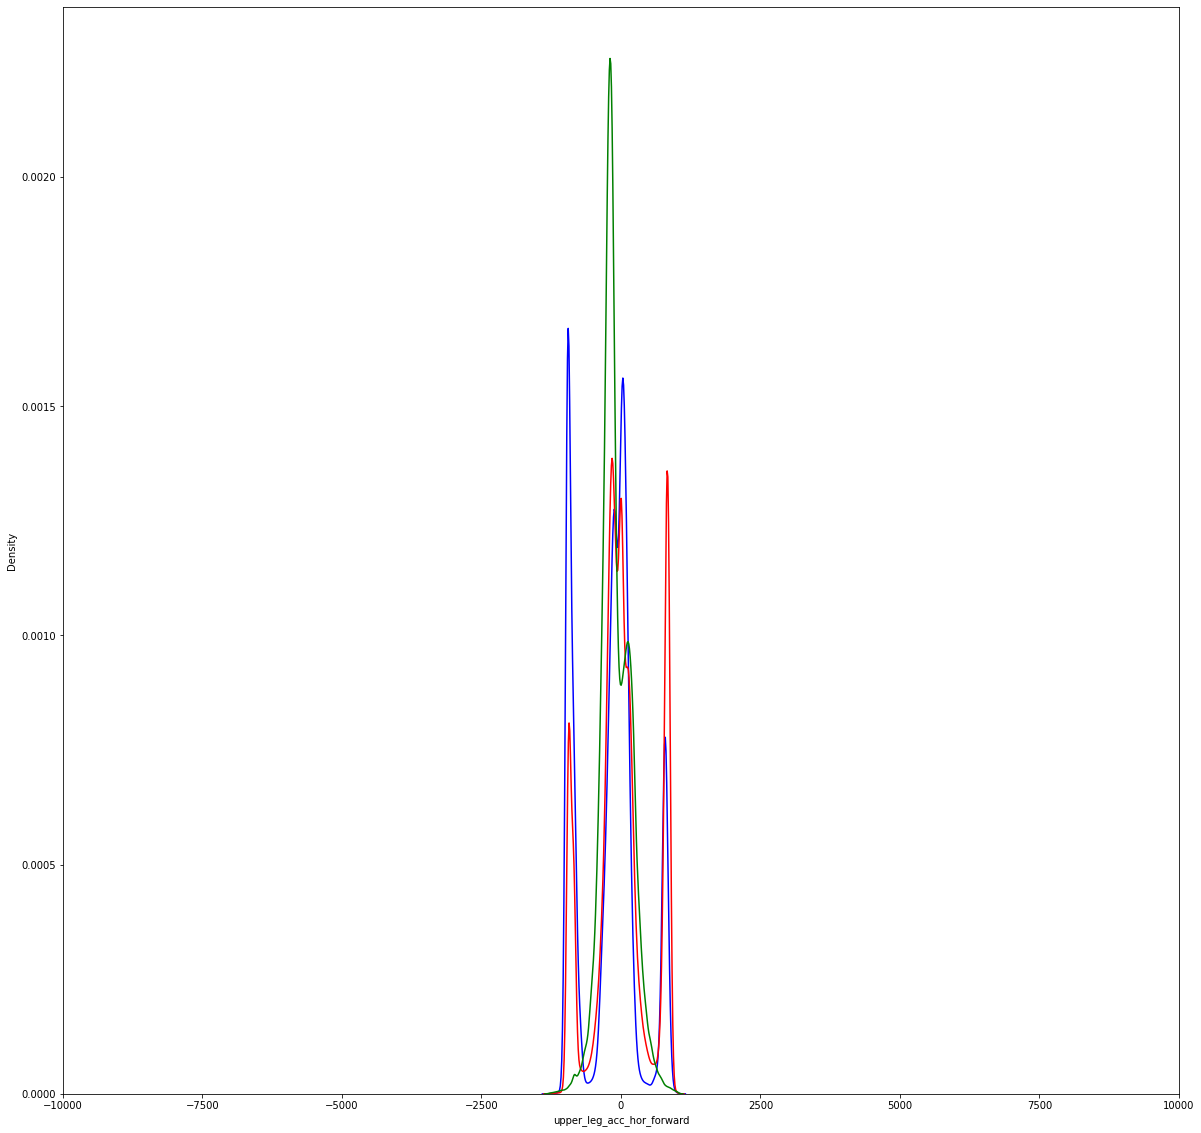

In [79]:
plt.figure(figsize= (20,20))
ax = sns.kdeplot(df_0['upper_leg_acc_hor_forward'],  color="blue", label="df_0_ankle_acc_hor_forward")
ax = sns.kdeplot(df_1['upper_leg_acc_hor_forward'],  color="red", label="df_1_ankle_acc_hor_forward")
ax = sns.kdeplot(df_2['upper_leg_acc_hor_forward'],  color="green", label="df_2_ankle_acc_hor_forward")
ax.set(xlim=(-10000, 10000))

[(-10000.0, 10000.0)]

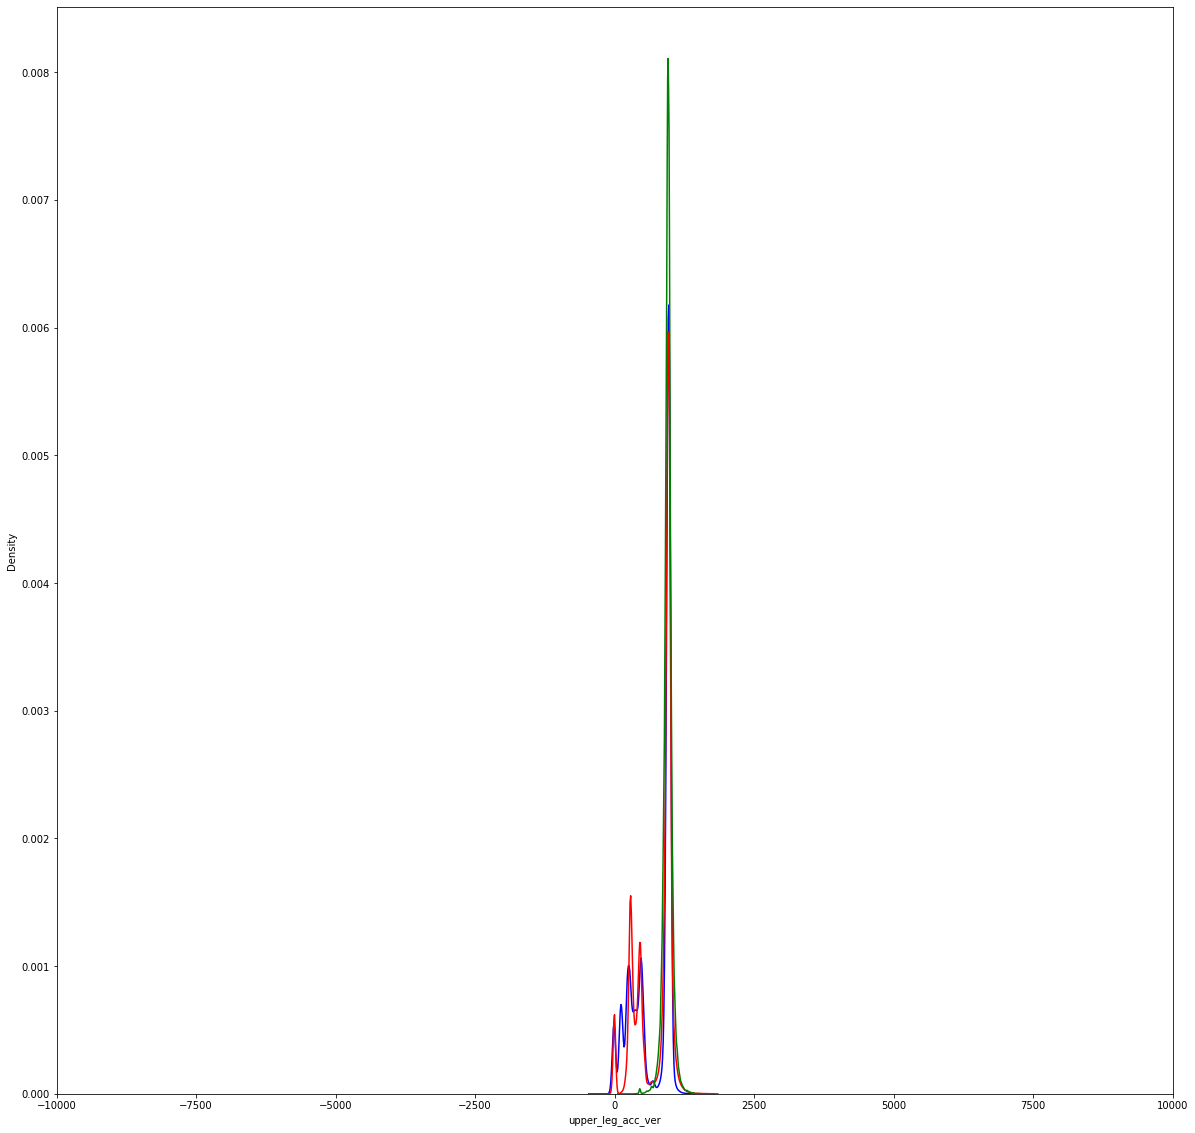

In [80]:
plt.figure(figsize= (20,20))
ax = sns.kdeplot(df_0['upper_leg_acc_ver'],  color="blue", label="df_0_ankle_acc_hor_forward")
ax = sns.kdeplot(df_1['upper_leg_acc_ver'],  color="red", label="df_1_ankle_acc_hor_forward")
ax = sns.kdeplot(df_2['upper_leg_acc_ver'],  color="green", label="df_2_ankle_acc_hor_forward")
ax.set(xlim=(-10000, 10000))

[(-10000.0, 10000.0)]

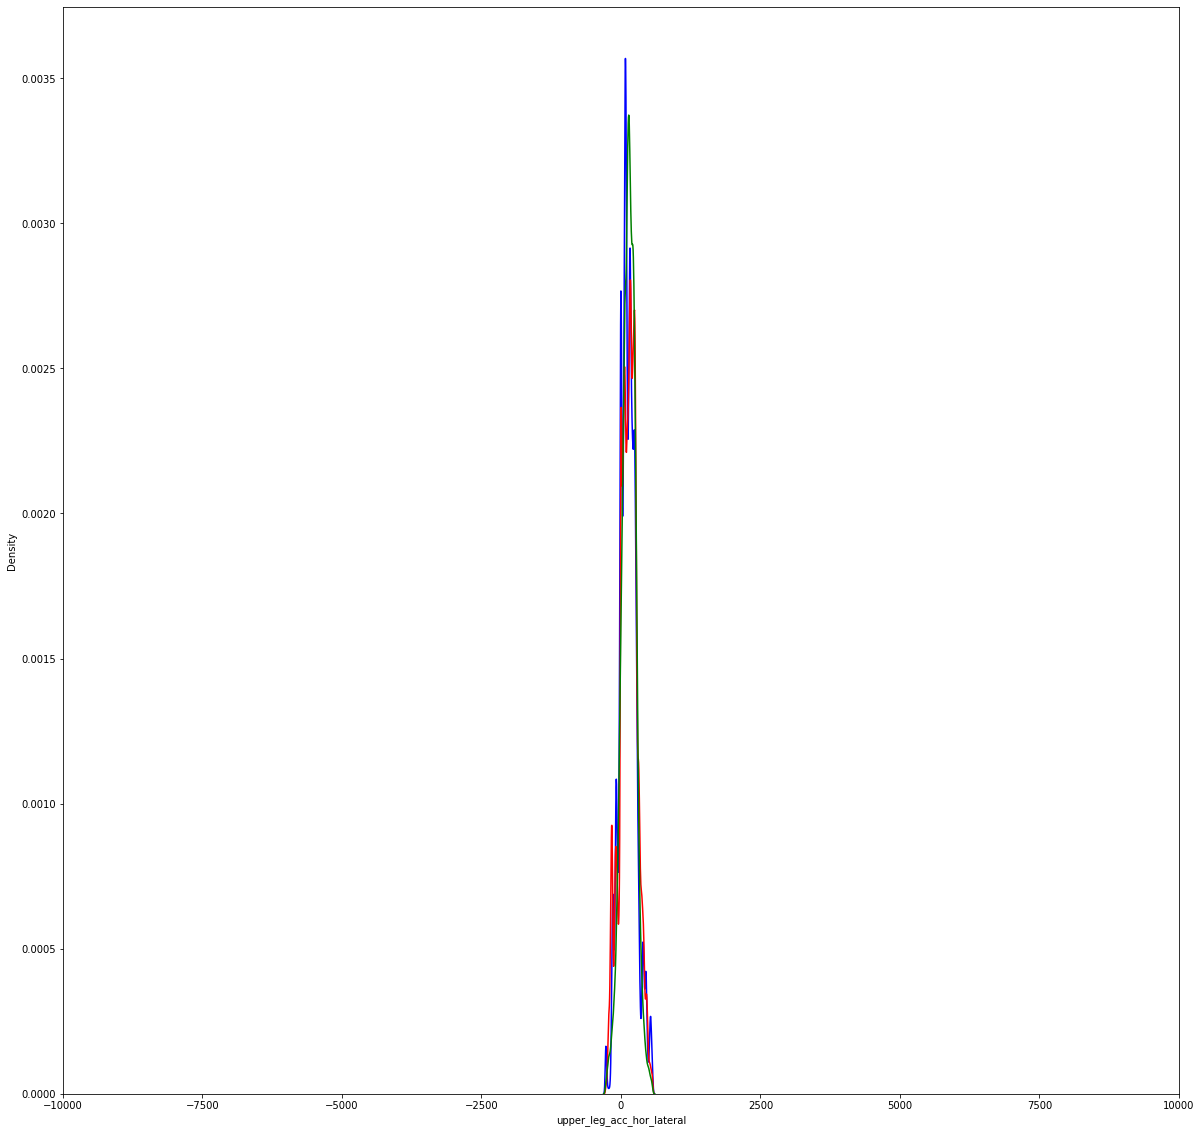

In [81]:
plt.figure(figsize= (20,20))
ax = sns.kdeplot(df_0['upper_leg_acc_hor_lateral'],  color="blue", label="df_0_ankle_acc_hor_forward")
ax = sns.kdeplot(df_1['upper_leg_acc_hor_lateral'],  color="red", label="df_1_ankle_acc_hor_forward")
ax = sns.kdeplot(df_2['upper_leg_acc_hor_lateral'],  color="green", label="df_2_ankle_acc_hor_forward")
ax.set(xlim=(-10000, 10000))

[(-10000.0, 10000.0)]

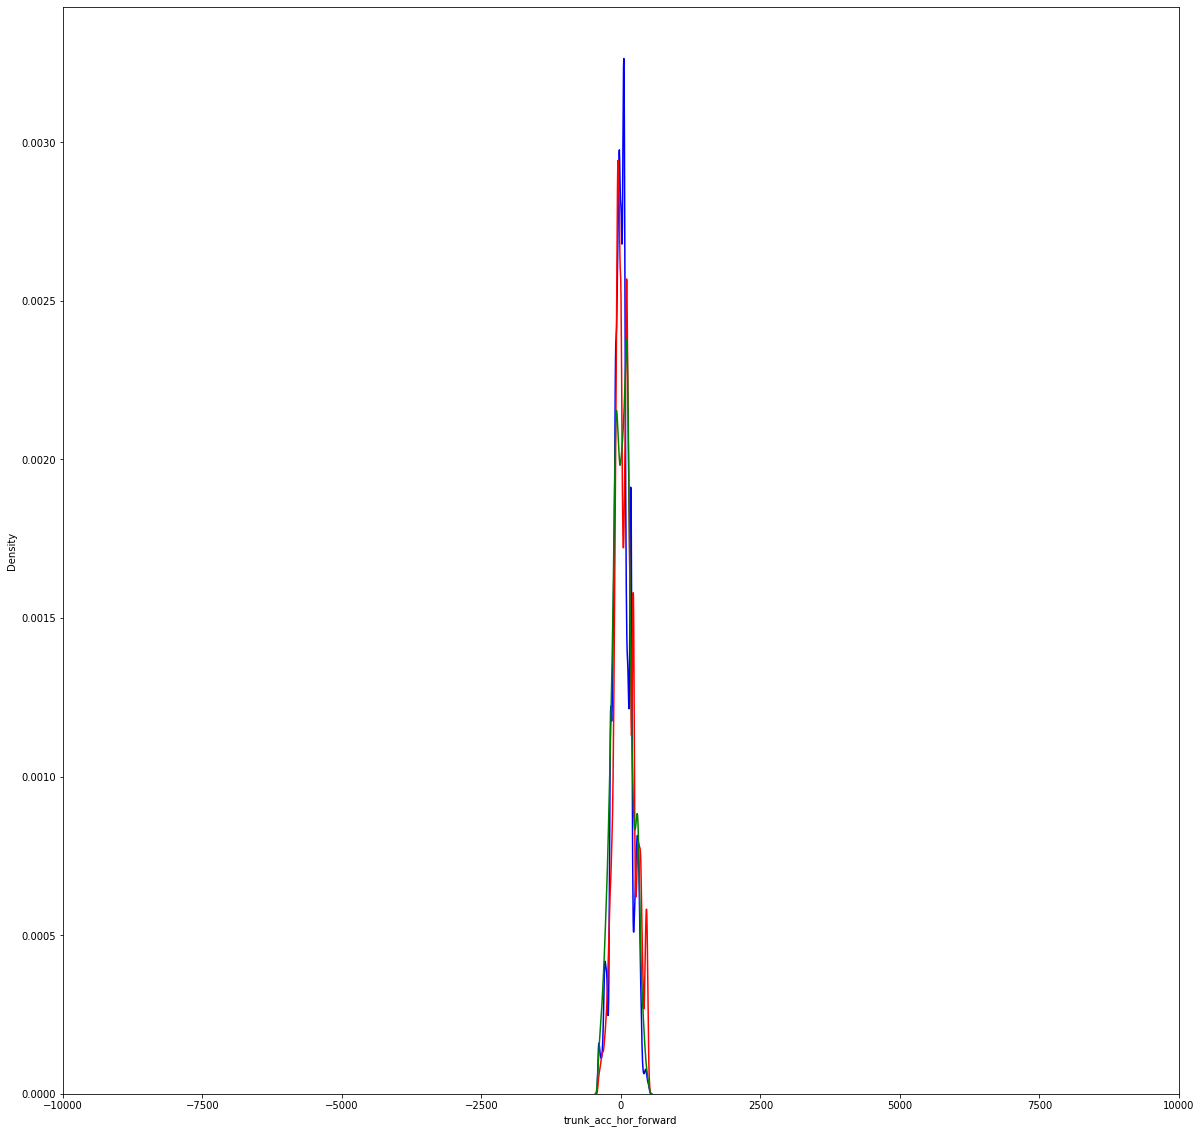

In [82]:
plt.figure(figsize= (20,20))
ax = sns.kdeplot(df_0['trunk_acc_hor_forward'],  color="blue", label="df_0_ankle_acc_hor_forward")
ax = sns.kdeplot(df_1['trunk_acc_hor_forward'],  color="red", label="df_1_ankle_acc_hor_forward")
ax = sns.kdeplot(df_2['trunk_acc_hor_forward'],  color="green", label="df_2_ankle_acc_hor_forward")
ax.set(xlim=(-10000, 10000))

<AxesSubplot:xlabel='trunk_acc_hor_forward', ylabel='Density'>

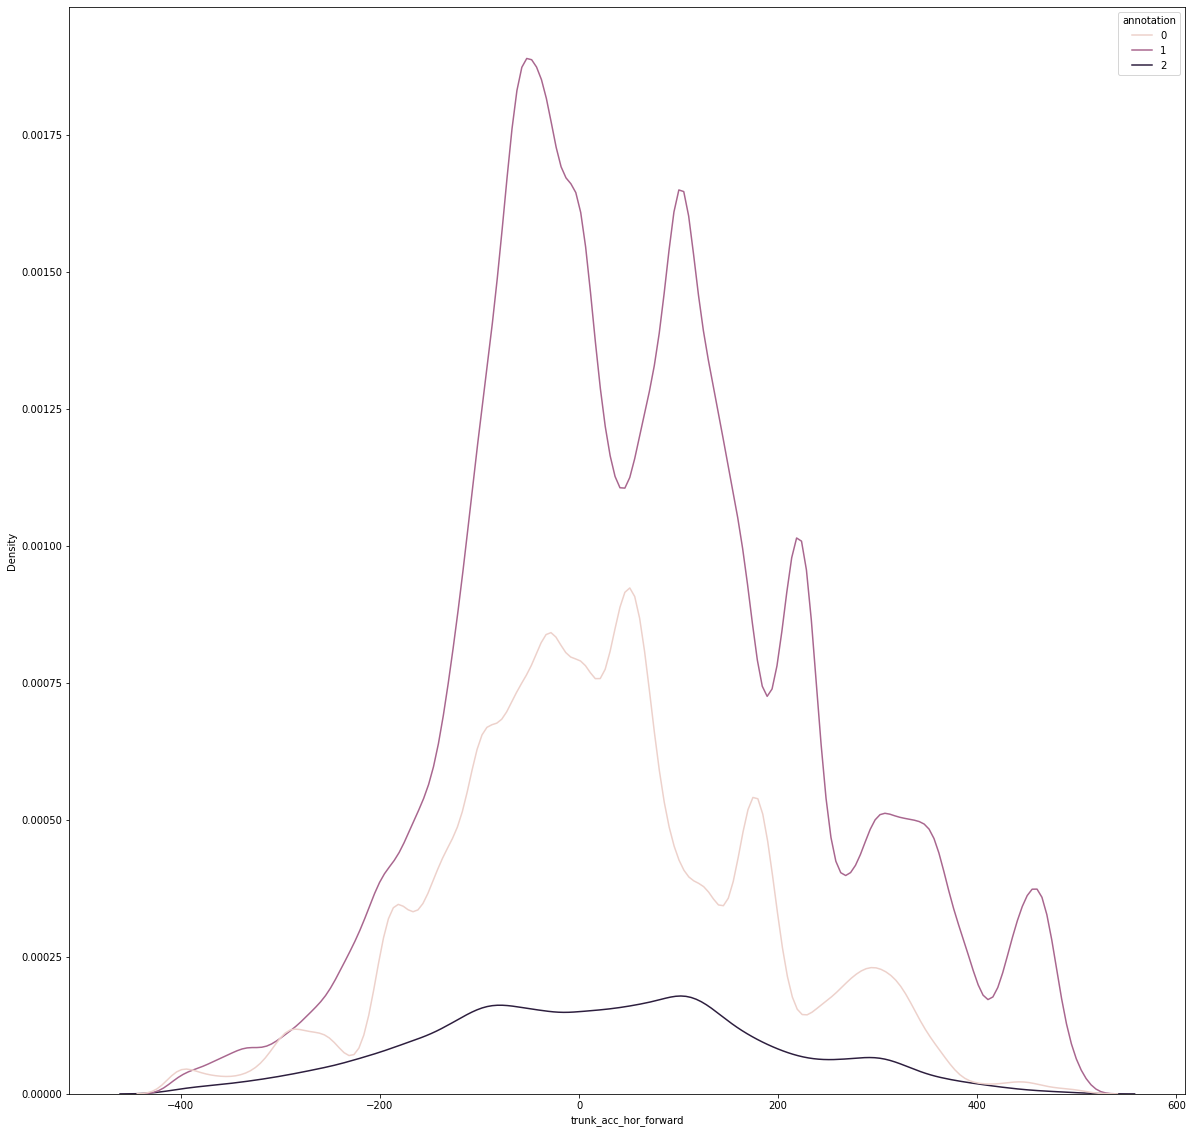

In [83]:
plt.figure(figsize= (20,20))
sns.kdeplot(df['trunk_acc_hor_forward'], hue= df['annotation'])

<AxesSubplot:xlabel='trunk_acc_ver', ylabel='Density'>

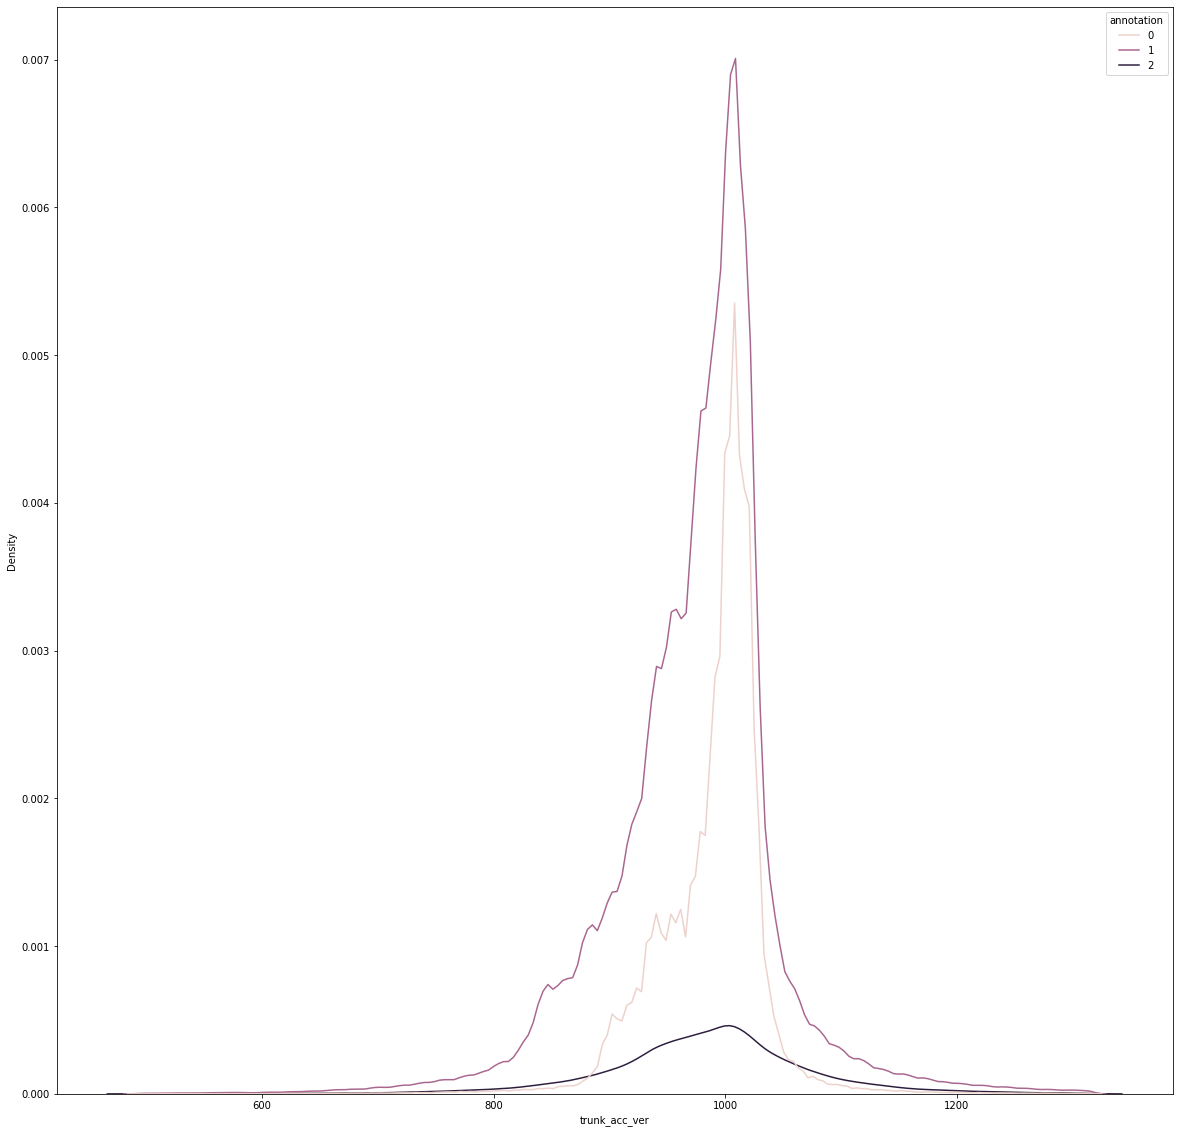

In [84]:
plt.figure(figsize= (20,20))
sns.kdeplot(df['trunk_acc_ver'], hue= df['annotation'])

<AxesSubplot:xlabel='trunk_acc_hor_lateral', ylabel='Density'>

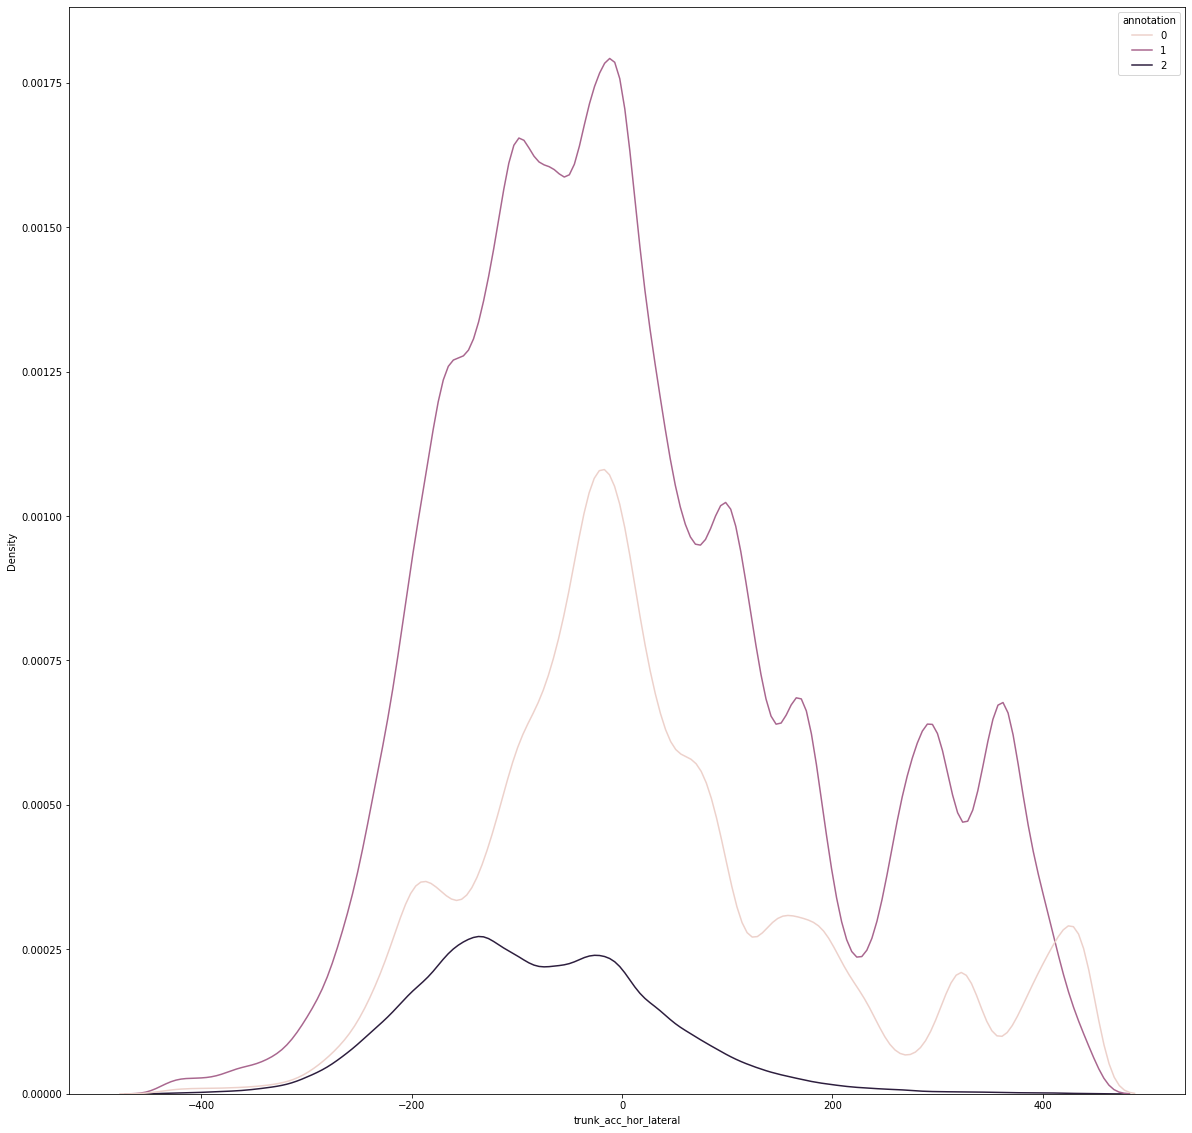

In [85]:
plt.figure(figsize= (20,20))
sns.kdeplot(df['trunk_acc_hor_lateral'], hue= df['annotation'])

In [86]:
df_0

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
0,-40,970,326,-36,962,242,320,657,349,0
1,-60,990,316,54,953,262,77,914,446,0
2,-111,980,346,-27,953,262,-48,857,446,0
3,-111,980,346,36,981,232,-38,800,446,0
4,-60,1009,346,18,972,242,77,866,436,0
...,...,...,...,...,...,...,...,...,...,...
985130,-373,931,306,854,398,-30,126,1009,9,0
985131,-363,911,306,872,379,-20,135,1009,-19,0
985132,-353,950,297,845,388,-10,126,990,-19,0
985133,-363,931,316,863,388,-20,126,1000,-29,0


In [87]:
df_0.describe()

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
count,289021.000000,289021.000000,289021.000000,289021.000000,289021.000000,289021.000000,289021.000000,289021.000000,289021.000000,289021.0
mean,-79.730860,982.137554,249.569190,-195.575913,694.660447,126.464440,18.555351,989.308441,28.889050,0.0
std,194.767705,60.305208,131.883896,527.765718,346.074680,142.263206,151.427796,47.641828,169.935585,0.0
min,-787.000000,764.000000,-108.000000,-1281.000000,-379.000000,-272.000000,-407.000000,495.000000,-436.000000,0.0
25%,-191.000000,960.000000,138.000000,-827.000000,370.000000,30.000000,-77.000000,971.000000,-77.000000,0.0
50%,-70.000000,1000.000000,237.000000,-109.000000,944.000000,121.000000,9.000000,1000.000000,0.000000,0.0
75%,70.000000,1019.000000,326.000000,72.000000,972.000000,212.000000,106.000000,1019.000000,106.000000,0.0
max,646.000000,1186.000000,594.000000,1027.000000,1703.000000,565.000000,504.000000,1314.000000,446.000000,0.0


In [88]:
df_1.describe()

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
count,656131.000000,656131.000000,656131.000000,656131.000000,656131.000000,656131.000000,656131.000000,656131.000000,656131.000000,656131.0
mean,-107.535253,980.237061,247.035475,6.775365,754.569321,135.525593,61.826867,974.949166,14.575254,1.0
std,238.930753,75.199978,126.401102,506.031101,312.438734,150.819117,169.163276,71.956872,174.719995,0.0
min,-787.000000,764.000000,-108.000000,-1281.000000,-388.000000,-272.000000,-407.000000,495.000000,-436.000000,1.0
25%,-272.000000,941.000000,168.000000,-227.000000,453.000000,40.000000,-58.000000,942.000000,-116.000000,1.0
50%,-90.000000,1000.000000,237.000000,-27.000000,935.000000,141.000000,48.000000,990.000000,-19.000000,1.0
75%,80.000000,1029.000000,326.000000,227.000000,972.000000,242.000000,165.000000,1009.000000,116.000000,1.0
max,646.000000,1186.000000,594.000000,1027.000000,1787.000000,565.000000,504.000000,1314.000000,446.000000,1.0


In [89]:
df_2.describe()

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral,annotation
count,76729.000000,76729.000000,76729.000000,76729.000000,76729.000000,76729.000000,76729.000000,76729.000000,76729.000000,76729.0
mean,27.412491,1008.111913,235.311877,-91.326852,955.333929,139.360867,22.911181,984.795983,-78.646288,2.0
std,197.420793,70.786855,103.266920,262.698298,76.983938,124.439670,170.627668,91.028239,114.878544,0.0
min,-787.000000,764.000000,-108.000000,-1281.000000,83.000000,-272.000000,-407.000000,495.000000,-436.000000,2.0
25%,-121.000000,980.000000,168.000000,-254.000000,925.000000,60.000000,-97.000000,942.000000,-155.000000,2.0
50%,50.000000,1009.000000,237.000000,-145.000000,953.000000,141.000000,19.000000,990.000000,-87.000000,2.0
75%,181.000000,1039.000000,306.000000,90.000000,990.000000,222.000000,135.000000,1028.000000,-9.000000,2.0
max,646.000000,1186.000000,594.000000,1027.000000,1694.000000,565.000000,504.000000,1314.000000,446.000000,2.0


## Interpretation of the above Graphs and the description df's

From the above distribution plots, we could not find any feature which shows a clear distinction between the 0, 1 and 2 category. Also from the description of the 3 df's, the mean and the standard deviation also didnot show any clear distinction between the categories.

In [90]:
df_heatmap = df.drop(columns=['annotation'])

In [91]:
df_heatmap

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral
0,-40,970,326,-36,962,242,320,657,349
1,-60,990,316,54,953,262,77,914,446
2,-111,980,346,-27,953,262,-48,857,446
3,-111,980,346,36,981,232,-38,800,446
4,-60,1009,346,18,972,242,77,866,436
...,...,...,...,...,...,...,...,...,...
1021876,-212,1000,376,690,-166,282,77,942,349
1021877,-232,970,356,572,-55,10,67,961,339
1021878,-232,970,356,272,92,-70,97,961,359
1021879,-252,921,346,354,18,-171,87,952,359


In [92]:
df_heatmap.corr()

,ankle_acc_hor_forward,ankle_acc_ver,ankle_acc_hor_lateral,upper_leg_acc_hor_forward,upper_leg_acc_ver,upper_leg_acc_hor_lateral,trunk_acc_hor_forward,trunk_acc_ver,trunk_acc_hor_lateral
ankle_acc_hor_forward,1.000000,0.460587,-0.031685,-0.253820,0.311477,0.151415,0.057021,0.020151,-0.234631
ankle_acc_ver,0.460587,1.000000,-0.438856,-0.120314,0.478124,-0.001425,-0.063498,0.069131,-0.309249
ankle_acc_hor_lateral,-0.031685,-0.438856,1.000000,-0.078814,-0.356738,0.235377,0.040323,-0.113298,0.371644
upper_leg_acc_hor_forward,-0.253820,-0.120314,-0.078814,1.000000,0.112868,0.163661,0.253597,-0.131784,0.089244
upper_leg_acc_ver,0.311477,0.478124,-0.356738,0.112868,1.000000,0.156021,-0.099447,0.149697,-0.482011
upper_leg_acc_hor_lateral,0.151415,-0.001425,0.235377,0.163661,0.156021,1.000000,0.175819,-0.130958,0.059194
trunk_acc_hor_forward,0.057021,-0.063498,0.040323,0.253597,-0.099447,0.175819,1.000000,-0.237177,0.160726
trunk_acc_ver,0.020151,0.069131,-0.113298,-0.131784,0.149697,-0.130958,-0.237177,1.000000,-0.184447
trunk_acc_hor_lateral,-0.234631,-0.309249,0.371644,0.089244,-0.482011,0.059194,0.160726,-0.184447,1.000000


From the correlation plots, we could see come medium level collinearity, but no significance collinearity can be seen between the features. Therefore we can conclude that there is no multicollinearity present in the dataset.